In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [3]:
df.shape

(1061, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [6]:
df.dtypes

name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [7]:
# What is the range of selling prices in the dataset?
# from the df.describe we can see that the maximum selling is 760000 and the minimum selling price is 5000.
# So the range of selling price is from 5000 - 760000

In [8]:
# What is the median selling price for bikes in the dataset?
np.median(df["selling_price"])

45000.0

In [9]:
# What is the most common seller type?
df["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [10]:
# the most common seller type is Individual

In [11]:
# How many bikes have driven more than 50,000 kilometers?
df[df["km_driven"]>50000].shape[0]

170

In [12]:
# 170 bikes have driven more than 50000 kilometers

In [13]:
# What is the average km_driven value for each ownership type?
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [14]:
# average kilometer driven is 34359.833176 kms

In [15]:
# What proportion of bikes are from the year 2015 or older?
df[df['year'] > 2015].shape[0]

460

In [16]:
# 460 bikes are from year 2015 or older

In [17]:
# What is the trend of missing values across the dataset?
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [18]:
# there are 435 null values in the ex_showroom_price column

In [19]:
# What is the highest ex_showroom_price recorded, and for which bike?
df[df["ex_showroom_price"] == df["ex_showroom_price"].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [20]:
# 1278000.0 is the highest ex_showroom_price for Harley-Davidson Street Bob	

In [21]:
# What is the total number of bikes listed by each seller type?
df["seller_type"].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

<Axes: xlabel='km_driven', ylabel='selling_price'>

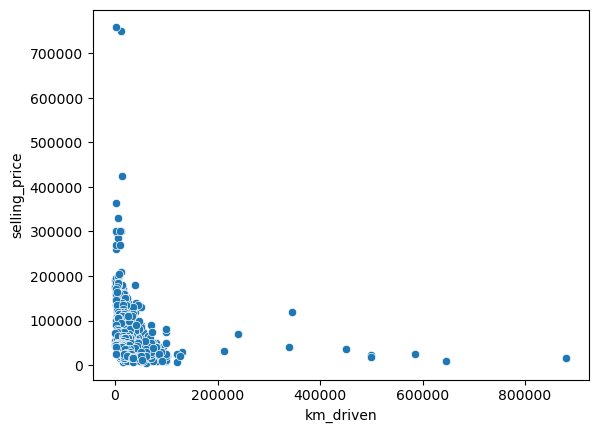

In [22]:
# What is the relationship between selling_price and km_driven for first-owner bikes?
sns.scatterplot(x = "km_driven", y = "selling_price",data = df)

In [23]:
# Interpretation >> As the km_driven increases the selling price decreases

In [24]:
# Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5*IQR
upper_fence = Q3+1.5*IQR

In [25]:
df = df[(df.km_driven >= lower_fence) & (df.km_driven <= upper_fence)]

In [26]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


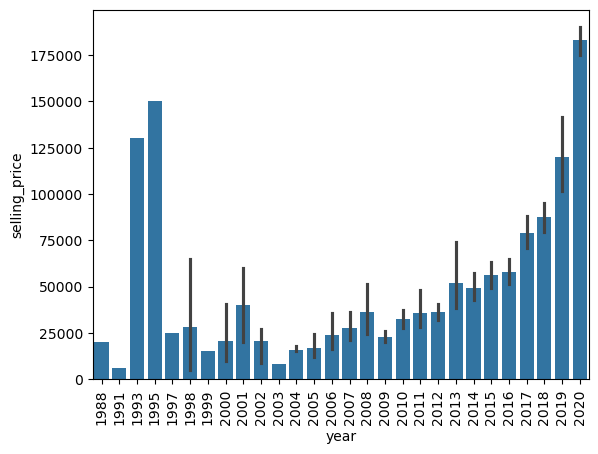

In [27]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price?
sns.barplot(x = 'year', y = 'selling_price',data = df)
plt.xticks(rotation=90)
plt.show()

In [28]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
# first we need to deal with the missing values in ex_showroom_price column
# we will calcualte the depriciation of the rows where there is no null values and other values will be null in depriciation columns
# fill the missing values of depriciation with mean

In [29]:
for i in df['ex_showroom_price']:
    if i == 'nan':
        df['depriciation'] = 'nan'
    else :
        df['depriciation'] = df['ex_showroom_price'] - df['selling_price']

In [30]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depriciation
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,-1886.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,24643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,NaN
...,...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0,58700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0,14000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,35000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,42000.0


In [31]:
df['depriciation'] = df['depriciation'].fillna(df['depriciation'].mean())

In [32]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    415
depriciation           0
dtype: int64

In [33]:
df.groupby('year')['depriciation'].mean()

year
1988    28357.655684
1991    28357.655684
1993    28357.655684
1995    28357.655684
1997    28357.655684
1998    28357.655684
1999    28357.655684
2000    28357.655684
2001    31604.827842
2002    28357.655684
2003    28357.655684
2004    31189.103789
2005    29535.823135
2006    30738.043961
2007    32187.113225
2008    34276.898320
2009    34594.776878
2010    36427.666349
2011    39061.707720
2012    32608.620938
2013    38910.555746
2014    32622.038113
2015    28323.051653
2016    28666.518690
2017    24507.382370
2018    19344.270282
2019    14179.185070
2020     7485.103789
Name: depriciation, dtype: float64

In [34]:
# Which bike names are priced significantly above the average price for their manufacturing year?
x = df.groupby('year')['selling_price'].mean()

In [35]:
x

year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     25000.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     16000.000000
2005     16978.571429
2006     23821.052632
2007     27768.181818
2008     36404.000000
2009     22934.782609
2010     32350.877193
2011     35931.017241
2012     36157.560606
2013     51802.816901
2014     49121.348315
2015     56313.131313
2016     57924.126214
2017     78962.121212
2018     87660.374046
2019    119689.511628
2020    183333.333333
Name: selling_price, dtype: float64

In [36]:
corr = df.corr(numeric_only = True)

<Axes: >

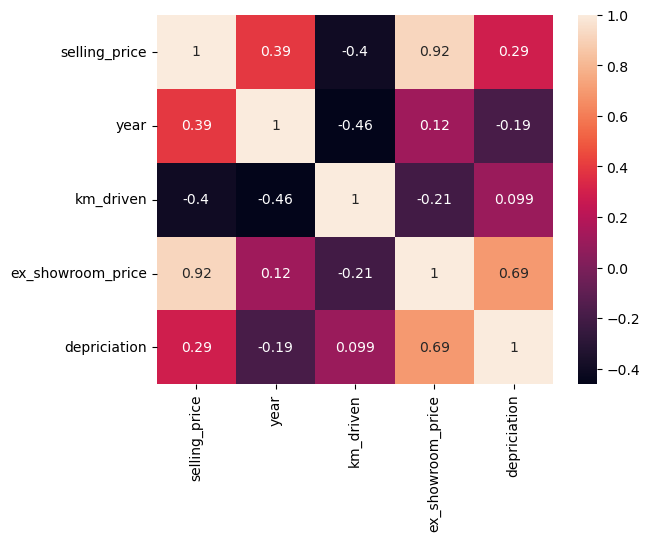

In [37]:
sns.heatmap(corr, annot = True)

# Car Sales

In [38]:
df = pd.read_csv('Car Sale.csv')

In [39]:
df.shape

(23906, 16)

In [40]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [42]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [43]:
#  What is the average selling price of cars for each dealer, and how does it compare across different dealers
df.groupby('Dealer_Name')['Price ($)'].mean()

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

In [44]:
# Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
# trends
std_values = df.groupby('Company')['Price ($)'].std().sort_values(ascending = False)
std_values
# interpretation >> Lincoln has the highest price variation 

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

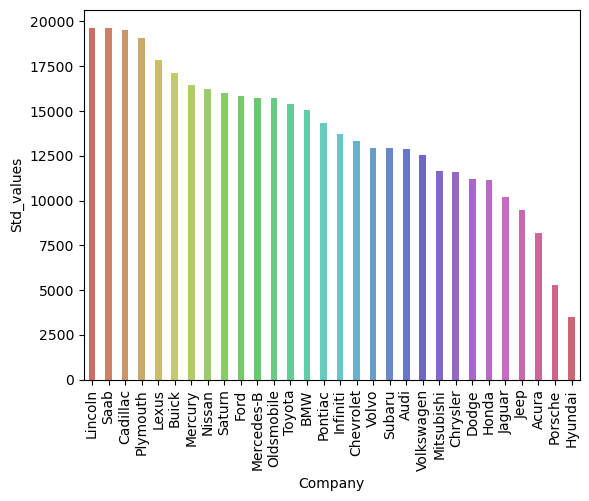

In [45]:
sns.barplot(std_values, palette = 'hls', gap = 0.5)
plt.xticks(rotation = 90)
plt.ylabel("Std_values")
plt.show()

<Axes: xlabel='Transmission', ylabel='Price ($)'>

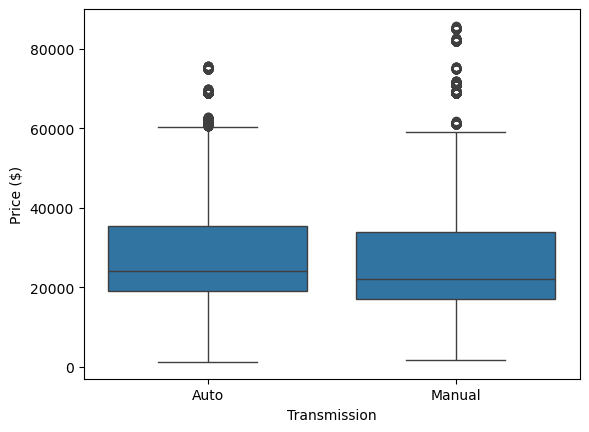

In [46]:
#  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(x = 'Transmission', y = 'Price ($)', data = df)

<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

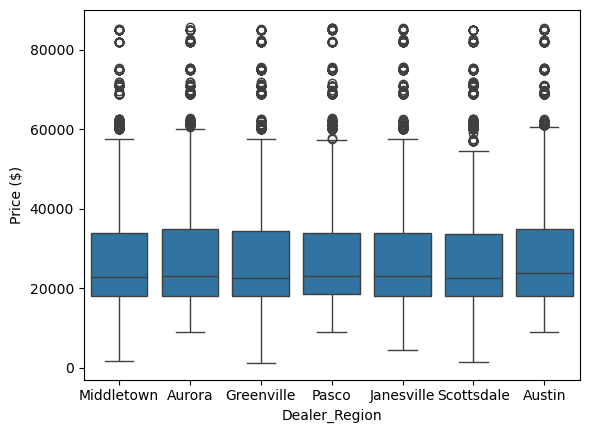

In [47]:
# What is the distribution of car prices across different regions
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data = df)

In [48]:
# What is the distribution of cars based on body styles?

In [49]:
df['Body Style'].value_counts()

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

<Axes: xlabel='Body Style', ylabel='Count'>

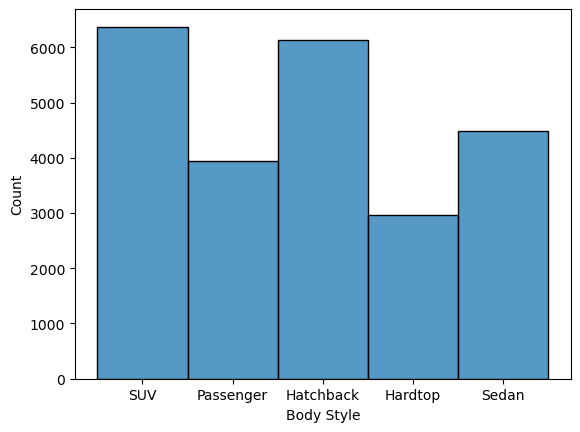

In [50]:
sns.histplot(df['Body Style'])

In [51]:
# How does the average selling price of cars vary by customer gender and annual income?

In [52]:
result = df.groupby('Annual Income')['Price ($)'].mean()
result

Annual Income
10080       22801.000000
13500       27878.981415
24000       61001.000000
85000       43000.000000
106000      46001.000000
                ...     
6600000     39000.000000
6800000     15000.000000
7650000     21000.000000
8000000     85000.000000
11200000    26001.000000
Name: Price ($), Length: 2508, dtype: float64

In [53]:
# sns.histplot(x = 'Annual Income',y = 'Price ($)', hue = 'Gender', data = df)

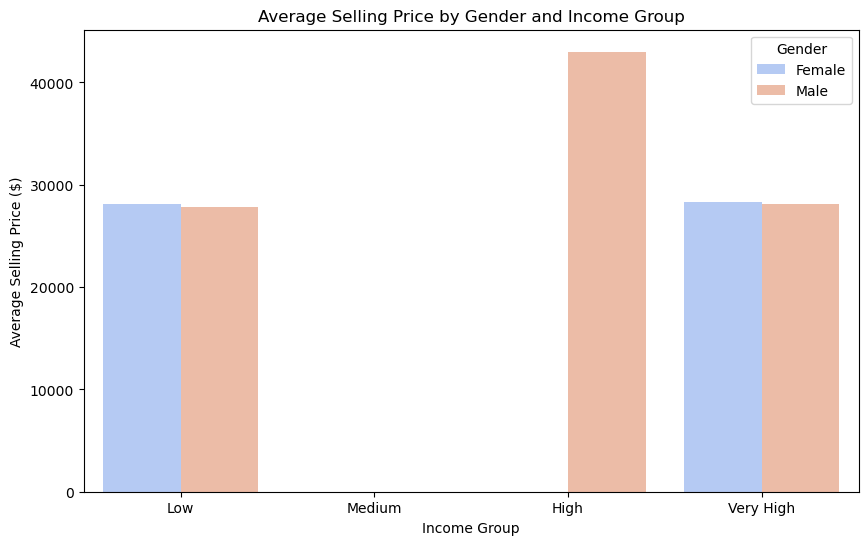

In [54]:
df['Income_Group'] = pd.cut(df['Annual Income'], bins=[0, 50000, 75000, 100000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
avg_price = df.groupby(['Gender', 'Income_Group'])['Price ($)'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_price, x='Income_Group', y='Price ($)', hue='Gender', palette="coolwarm")
plt.xlabel("Income Group")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Selling Price by Gender and Income Group")
plt.show()

In [55]:
distribution_by_gender_and_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()

In [56]:
distribution_by_gender_and_income

,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


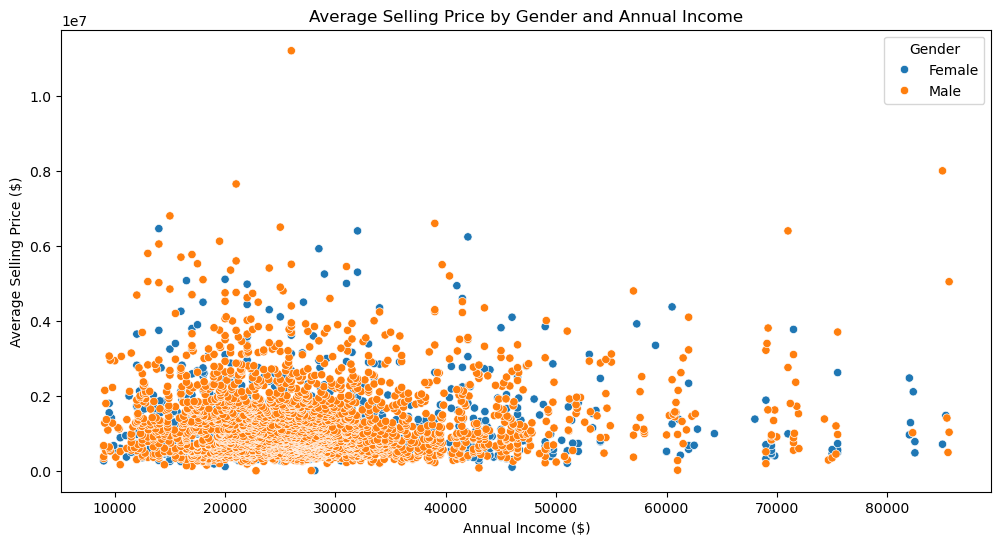

In [57]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=distribution_by_gender_and_income, x='Price ($)', y='Annual Income', hue='Gender')
plt.xlabel("Annual Income ($)")
plt.ylabel("Average Selling Price ($)")
plt.title("Average Selling Price by Gender and Annual Income")
plt.legend(title="Gender")
plt.show()


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

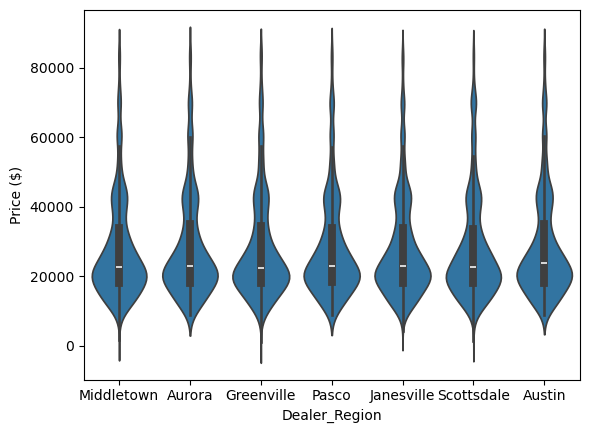

In [58]:
# What is the distribution of car prices by region, and how does the number of cars sold vary by region?

# distribution of car prices by region:
sns.violinplot(x = 'Dealer_Region', y = 'Price ($)', data = df)

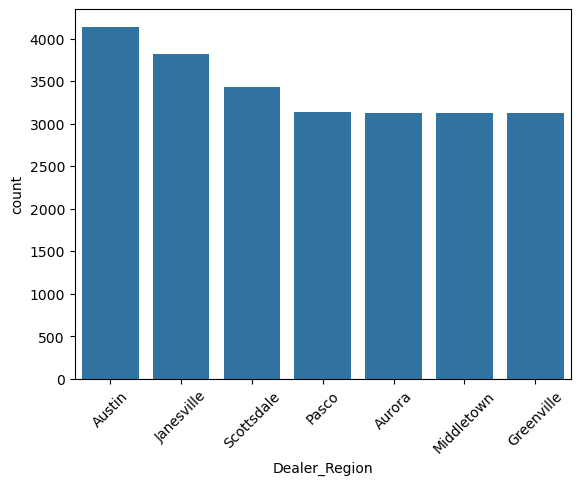

In [59]:
# Variation of number of cars by region
sns.barplot(df['Dealer_Region'].value_counts())
plt.xticks(rotation = 45)
plt.show()

In [60]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_Group'],
      dtype='object')

In [61]:
# How does the average car price differ between cars with different engine sizes?

result = df.groupby(['Engine'])['Price ($)'].mean()
result

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

<Axes: xlabel='Engine', ylabel='Price ($)'>

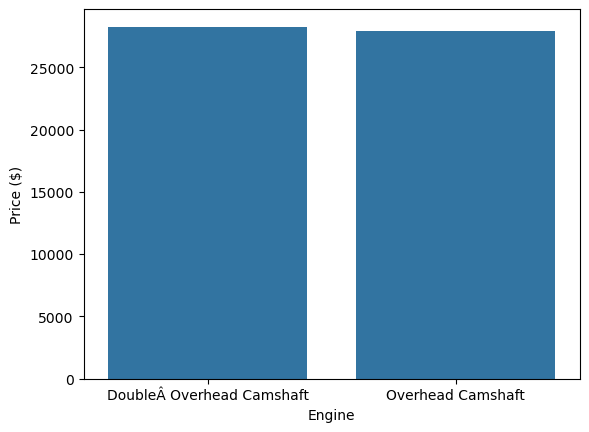

In [62]:
sns.barplot(result)

In [63]:
# How do car prices vary based on the customer’s annual income bracket?
distribution_by_income = df.groupby('Annual Income')['Price ($)'].describe().reset_index()
distribution_by_income

,Annual Income,count,mean,std,min,25%,50%,75%,max
0,10080,1.0,22801.000000,NaN,22801.0,22801.0,22801.0,22801.0,22801.0
1,13500,5273.0,27878.981415,14904.756077,1200.0,18000.0,22001.0,34000.0,85001.0
2,24000,1.0,61001.000000,NaN,61001.0,61001.0,61001.0,61001.0,61001.0
3,85000,1.0,43000.000000,NaN,43000.0,43000.0,43000.0,43000.0,43000.0
4,106000,1.0,46001.000000,NaN,46001.0,46001.0,46001.0,46001.0,46001.0
...,...,...,...,...,...,...,...,...,...
2503,6600000,1.0,39000.000000,NaN,39000.0,39000.0,39000.0,39000.0,39000.0
2504,6800000,1.0,15000.000000,NaN,15000.0,15000.0,15000.0,15000.0,15000.0
2505,7650000,1.0,21000.000000,NaN,21000.0,21000.0,21000.0,21000.0,21000.0
2506,8000000,1.0,85000.000000,NaN,85000.0,85000.0,85000.0,85000.0,85000.0


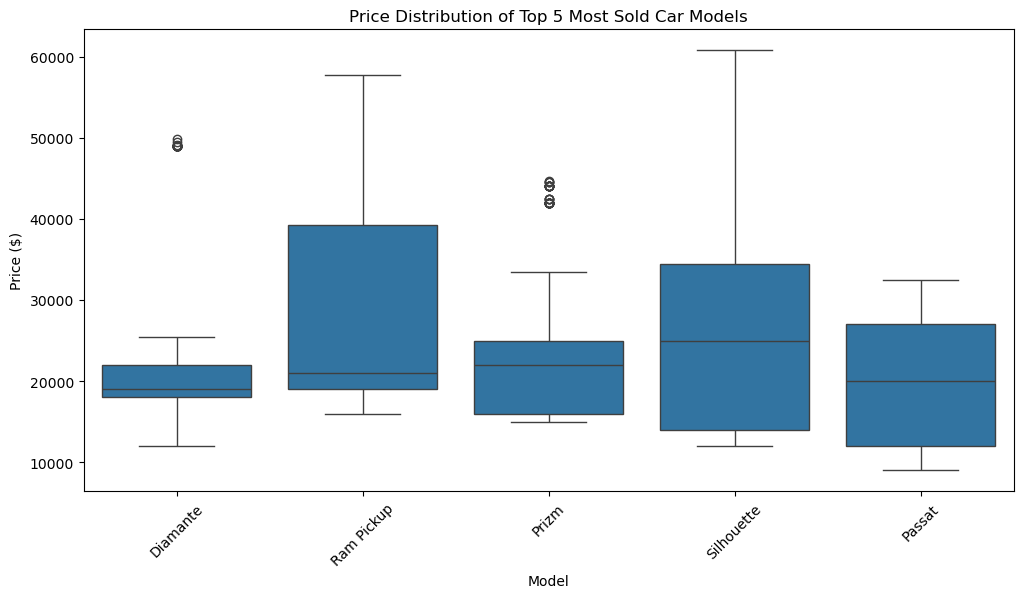

In [64]:
# What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df["Model"].value_counts().head(5).index
df_top_models = df[df["Model"].isin(top_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Model", y="Price ($)", data=df_top_models)
plt.xticks(rotation=45)
plt.title("Price Distribution of Top 5 Most Sold Car Models")
plt.show()

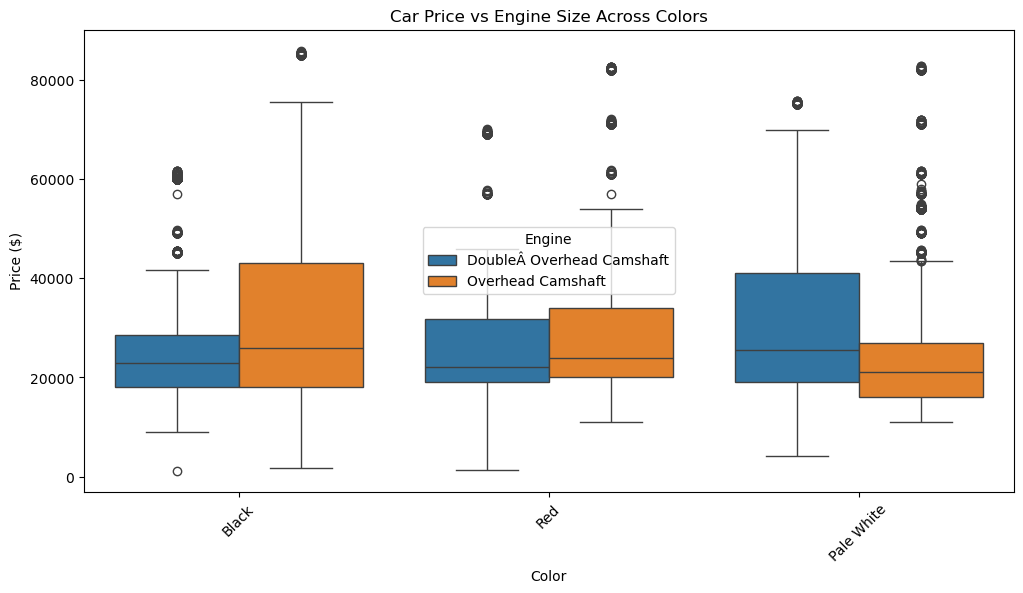

In [65]:
# How does car price vary with engine size across different car colors, and which colors have the highest price variation
plt.figure(figsize=(12, 6))
sns.boxplot(x="Color", y="Price ($)", hue="Engine", data=df)
plt.xticks(rotation=45)
plt.title("Car Price vs Engine Size Across Colors")
plt.show()

In [66]:
# Is there any seasonal trend in car sales based on the date of sale
df['Date'] = pd.to_datetime(df['Date'])

In [67]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

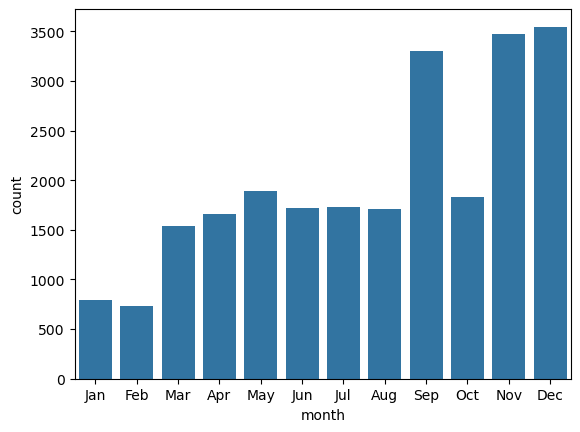

In [68]:
sns.countplot(x = 'month', data = df)
plt.xticks(range(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()
# interpretation >> december has highest sales

<Axes: xlabel='Body Style', ylabel='Price ($)'>

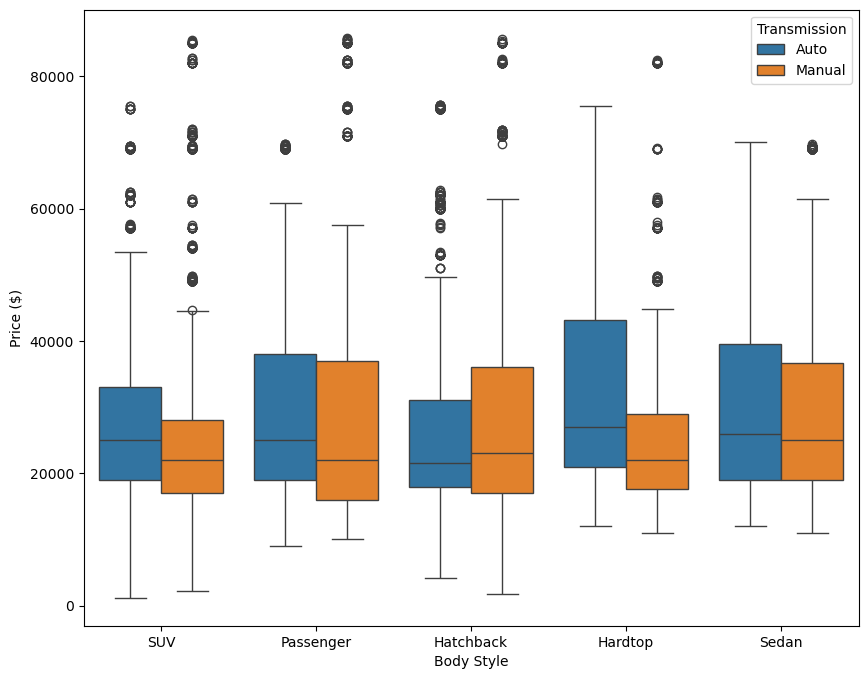

In [69]:
# How does the car price distribution change when considering different combinations of body style and
# transmission type
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Body Style', y = 'Price ($)', hue = 'Transmission', data = df)

<Axes: >

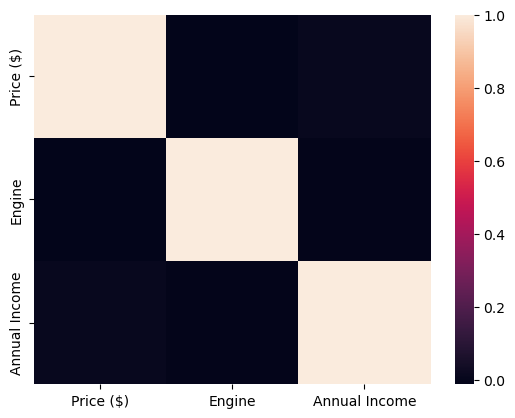

In [70]:
# What is the correlation between car price, engine size, and annual income of customers, and how do these
# features interact


# encoding of Engine
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
numerical_data = encoder.fit_transform(df['Engine'])
df['Engine'] = numerical_data

sns.heatmap(df[['Price ($)', 'Engine', 'Annual Income']].corr())

In [71]:
# How does the average car price vary across different car models and engine types?

df.groupby(['Engine','Model'])['Price ($)'].mean().reset_index()

,Engine,Model,Price ($)
0,0,3-Sep,37986.380117
1,0,3000GT,22764.326923
2,0,300M,21394.888889
3,0,323i,16744.632287
4,0,328i,21069.149606
...,...,...,...
256,1,Viper,26052.375000
257,1,Voyager,33995.678322
258,1,Windstar,17100.272727
259,1,Wrangler,18742.942029


# EDA - 3

In [72]:
df = pd.read_csv('amazon.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [74]:
# data ingestion and data preprocessing
df.drop('product_id', inplace = True, axis = 1)

In [75]:
df.category.nunique()

211

In [76]:
df.discounted_price = df.discounted_price.str.split('₹').str[1]

In [77]:
df.discounted_price = df.discounted_price.str.replace(",","")

In [78]:
df.discounted_price = df.discounted_price.astype(float)

In [79]:
df.actual_price = df.actual_price.str.replace("₹", "").str.replace(",","").astype(float)

In [80]:
df.discount_percentage = df.discount_percentage.str.replace("%","").astype(int)

In [81]:
df[df.rating == '|'] = 1

In [82]:
df.rating = df.rating.astype(float)

In [83]:
df.rating_count = df.rating_count.str.replace(',','').astype(float)

In [84]:
df.drop('about_product',inplace = True, axis = 1)

In [85]:
df.drop(['user_id','user_name'], axis = 1, inplace = True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   category             1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   int32  
 5   rating               1465 non-null   float64
 6   rating_count         1462 non-null   float64
 7   review_id            1465 non-null   object 
 8   review_title         1465 non-null   object 
 9   review_content       1465 non-null   object 
 10  img_link             1465 non-null   object 
 11  product_link         1465 non-null   object 
dtypes: float64(4), int32(1), object(7)
memory usage: 131.8+ KB


In [87]:
# EDA 

In [88]:
# Q1 What is the average rating for each product category?

df.groupby('category')['rating'].mean().reset_index()

,category,rating
0,1,1.000000
1,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
2,Computers&Accessories|Accessories&Peripherals|...,4.150000
3,Computers&Accessories|Accessories&Peripherals|...,3.500000
4,Computers&Accessories|Accessories&Peripherals|...,3.600000
...,...,...
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
210,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [89]:
# Q2 What are the top rating_count products by category?

df.groupby(['category'])['rating_count'].max().reset_index()

,category,rating_count
0,1,NaN
1,Car&Motorbike|CarAccessories|InteriorAccessori...,1118.0
2,Computers&Accessories|Accessories&Peripherals|...,4426.0
3,Computers&Accessories|Accessories&Peripherals|...,7222.0
4,Computers&Accessories|Accessories&Peripherals|...,14969.0
...,...,...
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,5792.0
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,6199.0
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,5719.0
210,OfficeProducts|OfficePaperProducts|Paper|Stati...,4308.0


<Axes: xlabel='discounted_price', ylabel='actual_price'>

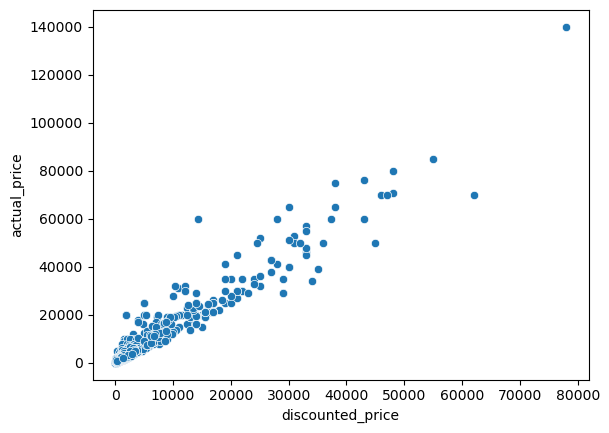

In [90]:
# Q 3 What is the distribution of discounted prices vs. actual prices?

sns.scatterplot(x = 'discounted_price', y = 'actual_price', data = df)

In [91]:
# Q4 How does the average discount percentage vary across categories?
df['Discount %'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100


avg_discount = df.groupby('category')['Discount %'].mean().reset_index()
print(avg_discount)

                                              category  Discount %
0                                                    1    0.000000
1    Car&Motorbike|CarAccessories|InteriorAccessori...   41.525000
2    Computers&Accessories|Accessories&Peripherals|...   78.387733
3    Computers&Accessories|Accessories&Peripherals|...   35.035035
4    Computers&Accessories|Accessories&Peripherals|...   56.335120
..                                                 ...         ...
207  OfficeProducts|OfficePaperProducts|Paper|Stati...    0.000000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...    5.000000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...   17.619048
210  OfficeProducts|OfficePaperProducts|Paper|Stati...   13.074074
211  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...    0.000000

[212 rows x 2 columns]


In [92]:
# Q5 What are the most popular product names?
df[df['rating_count'] == df['rating_count'].max()]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_id,review_title,review_content,img_link,product_link,Discount %
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,69,4.4,426973.0,"R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...,68.714286
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,475.0,35,4.4,426973.0,"R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...,34.947368
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,1400.0,78,4.4,426973.0,"R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...,77.928571


In [93]:
# Q6 What are the most popular product keywords?



In [94]:
# Q7 What are the most popular reviews?

df['review_title'].value_counts().reset_index().head(5)

,review_title,count
0,"Worked on iPhone 7 and didn’t work on XR,Good ...",10
1,"Satisfied,Charging is really fast,Value for mo...",8
2,"Phone, camera, heating - works for me, may not...",8
3,"Good product,Good one,Nice,Really nice product...",7
4,"A Good Braided Cable for Your Type C Device,Go...",7


<Axes: >

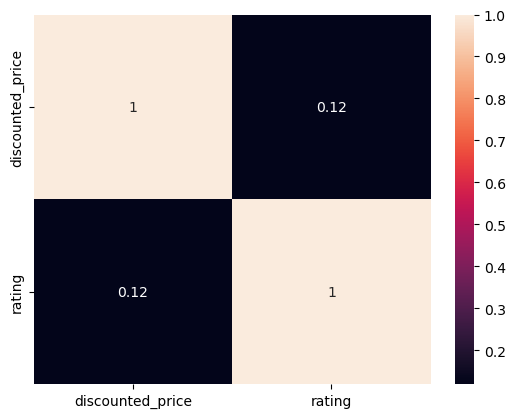

In [95]:
# Q8 What is the correlation between discounted_price and rating?
corr = df[['discounted_price', 'rating']].corr()
sns.heatmap(corr, annot = True)

In [96]:
top_categories = df.sort_values(by='rating', ascending=False).category.head(5)
top_categories

324     Computers&Accessories|Accessories&Peripherals|...
174     Computers&Accessories|Accessories&Peripherals|...
775     Computers&Accessories|Accessories&Peripherals|...
1145    Home&Kitchen|Heating,Cooling&AirQuality|WaterH...
1201    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, dtype: object

In [97]:
potential_areas_improvement = df.groupby("product_name")["rating"].min().reset_index().sort_values("rating", ascending = True).head(10)
potential_areas_improvement

,product_name,rating
0,1,1.0
547,Khaitan ORFin Fan heater for Home and kitchen-...,2.0
787,"Personal Size Blender, Portable Blender, Batte...",2.3
418,Green Tales Heat Seal Mini Food Sealer-Impulse...,2.6
929,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,2.8
662,MR. BRAND Portable USB Juicer Electric USB Jui...,2.8
490,IONIX Tap filter Multilayer | Activated Carbon...,2.9
1100,Tokdis MX-1 Pro Bluetooth Calling Smartwatch -...,3.0
8,7SEVEN Compatible LG TV Remote Suitable for LG...,3.0
695,"Nirdambhay Mini Bag Sealer, 2 in 1 Heat Sealer...",3.0


# EDA - 4

In [98]:
df = pd.read_csv("spotify.csv")

In [99]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [100]:
df.shape

(440, 5)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [102]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [112]:
# Q1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful
df = df.drop_duplicates(keep = "first")

In [113]:
df.shape

(413, 5)

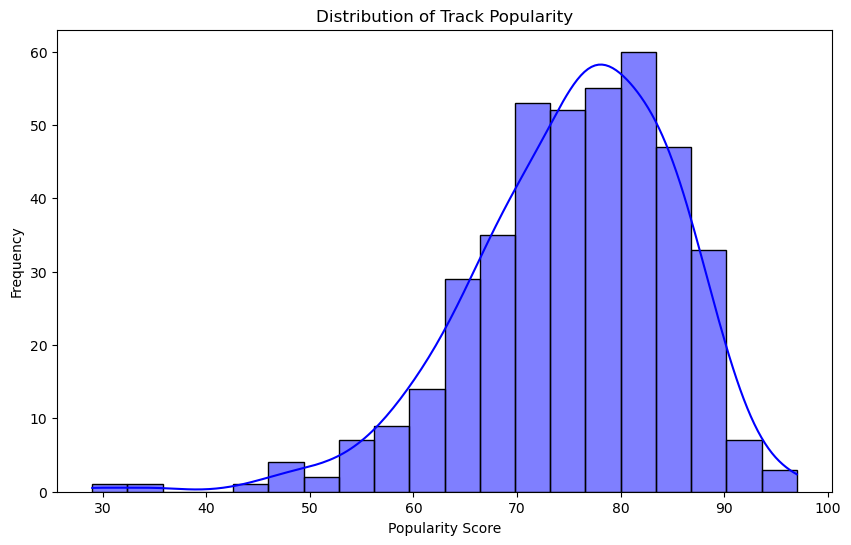

In [116]:
# Q2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

plt.figure(figsize=(10, 6))
sns.histplot(df["Popularity"], bins=20, kde=True, color="blue")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Track Popularity")
plt.show()

<Axes: xlabel='Popularity', ylabel='Duration (ms)'>

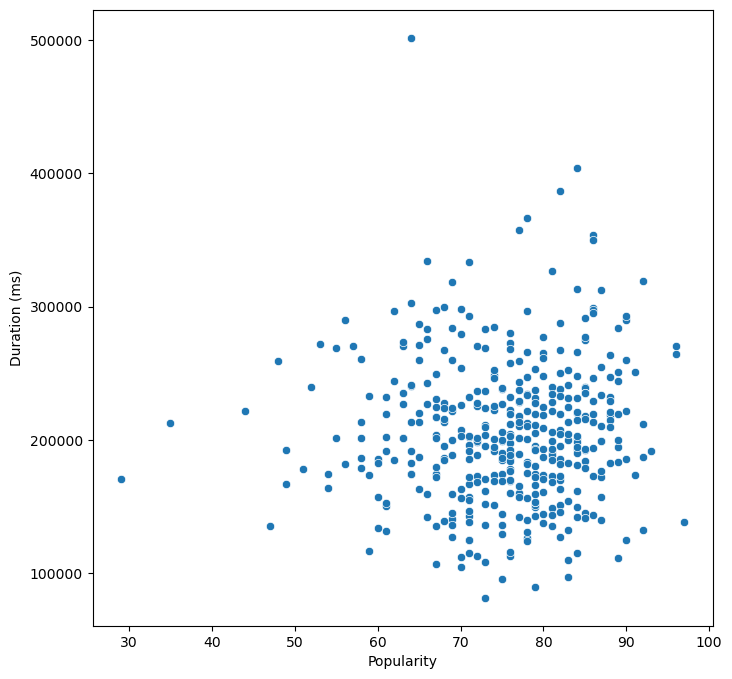

In [120]:
# Q3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

plt.figure(figsize = (8, 8))
sns.scatterplot(x = "Popularity", y = "Duration (ms)", data = df)

In [143]:
# Q 4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot

x = df.groupby("Artist")['Track ID'].count().reset_index().sort_values(by = "Track ID",ascending = False)
x = x.head(20)
x

,Artist,Track ID
29,Drake,17
33,Eminem,11
114,¥$,10
2,21 Savage,10
102,Timbaland,10
69,Ludacris,10
63,Lil Nas X,10
46,JAY-Z,10
36,Flo Rida,10
103,Travis Scott,9


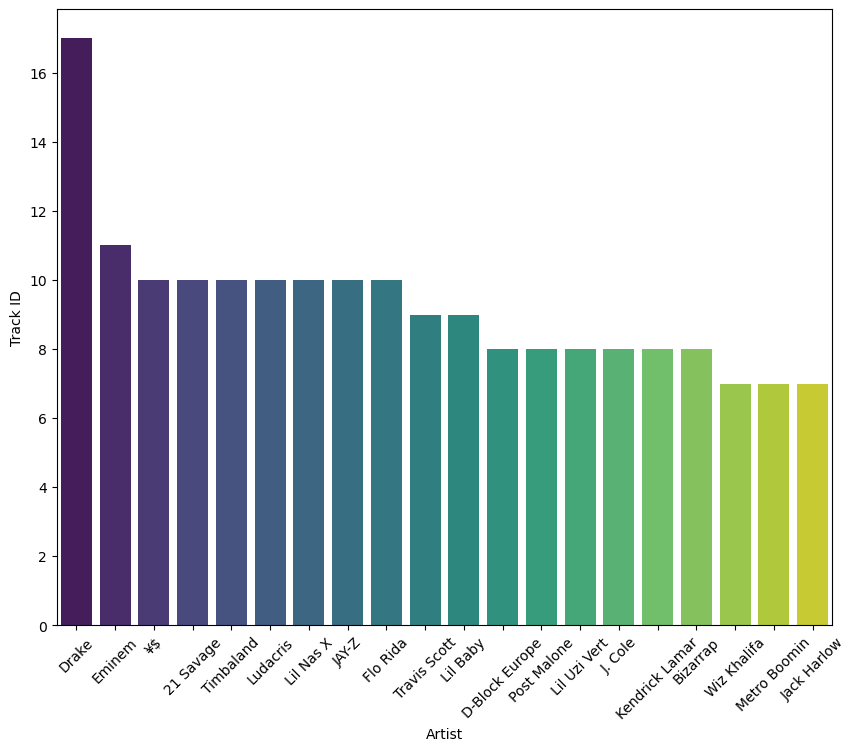

In [148]:
# Count plot

plt.figure(figsize = (10, 8))
sns.barplot(x = "Artist", y = "Track ID",data = x, palette = "viridis")
plt.xticks(rotation = 45)
plt.show()

In [161]:
# Q5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

df.sort_values(by = "Popularity").head(5)

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


In [167]:
# Q6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist

df.groupby("Artist")["Popularity"].mean().reset_index().sort_values(by = "Popularity", ascending = False).head(5).rename(columns={'Popularity': 'Avg Popularity'})

,Artist,Avg Popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,86.555556
114,¥$,85.100000


In [178]:
# Q7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

df.groupby(["Artist", "Track Name"])["Popularity"].value_counts().reset_index().sort_values(by = "Popularity", ascending = False).head(5).drop('count', axis = 1)

,Artist,Track Name,Popularity
174,Jack Harlow,Lovin On Me,97
11,21 Savage,redrum,96
405,¥$,CARNIVAL,96
368,Travis Scott,FE!N (feat. Playboi Carti),93
402,cassö,Prada,92


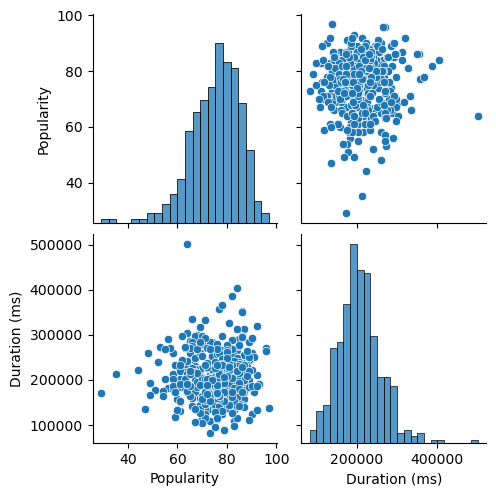

In [184]:
# Q8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

sns.pairplot(data = df)

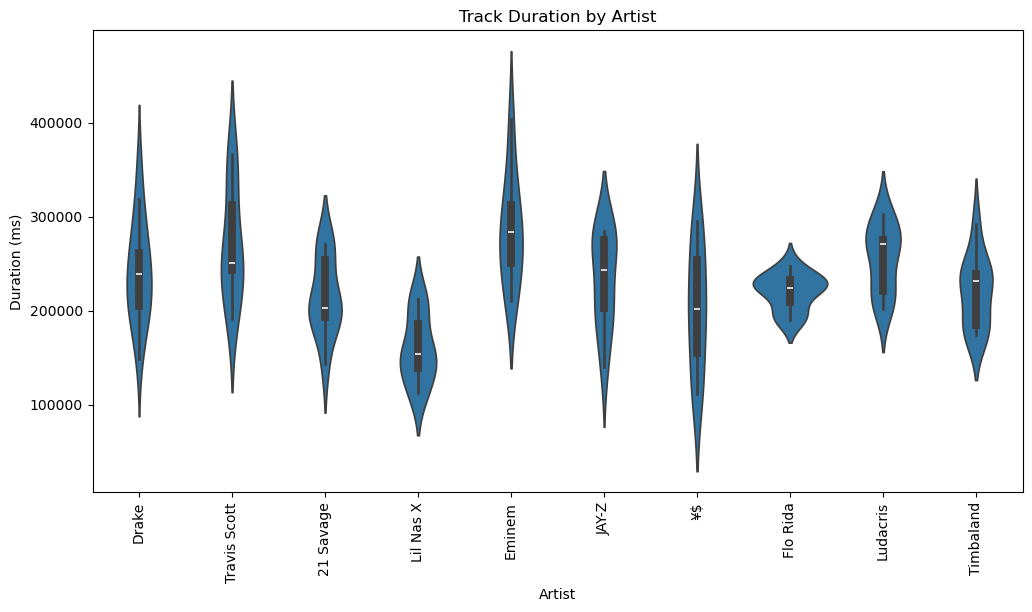

In [185]:
# Q9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot

top_artists = df["Artist"].value_counts().head(10).index
df_top_artists = df[df["Artist"].isin(top_artists)]

plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Duration (ms)", data=df_top_artists)
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.title("Track Duration by Artist")
plt.show()

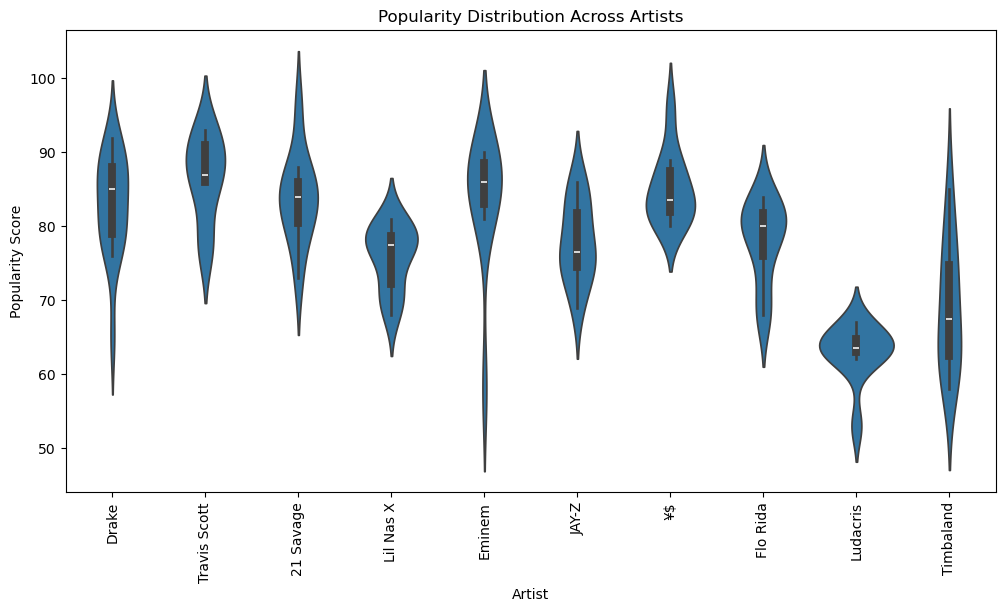

In [186]:
# Q10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot.

plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df_top_artists)
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Popularity Score")
plt.title("Popularity Distribution Across Artists")
plt.show()
